In [2]:
import zipfile
import os
import cv2
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

In [ ]:
zip_file_path = '/content/animals.zip'
extract_folder = '/content/animals'

In [ ]:
extract_zip(zip_file_path, extract_folder)

In [ ]:
def load_images_from_folder(folder, label, num_images=100, show_images=False):
    images = []
    labels = []
    for idx, filename in enumerate(os.listdir(folder)[:num_images]):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            images.append(img.flatten())
            labels.append(label)

            # Show first 5 images if requested
            if show_images and idx < 100:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(img_rgb)
                plt.title(f"{filename} (Label: {label})")
                plt.axis('off')
                plt.show()

    return images, labels

In [ ]:
cat_folder = '/content/animals/animals/cats'
dog_folder = '/content/animals/animals/dogs'
panda_folder = '/content/animals/animals/panda'

In [ ]:
cat_images, cat_labels = load_images_from_folder(cat_folder, 'cat')
dog_images, dog_labels = load_images_from_folder(dog_folder, 'dog')
panda_images, panda_labels = load_images_from_folder(panda_folder, 'panda')

In [ ]:
images = np.array(cat_images + dog_images + panda_images)
labels = np.array(cat_labels + dog_labels + panda_labels)

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:

cv_results = []

In [ ]:
for fold, (train_index, test_index) in enumerate(kf.split(images, encoded_labels), 1):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]


    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)


    fold_accuracy = {}

    for animal_idx, animal_name in enumerate(label_encoder.classes_):

        true_indices = np.where(y_test == animal_idx)[0]
        pred_indices = np.where(y_pred == animal_idx)[0]


        correct_preds = len(np.intersect1d(true_indices, pred_indices))
        total_samples = len(true_indices)


        if total_samples > 0:
            accuracy = correct_preds / total_samples
        else:
            accuracy = 0.0

        fold_accuracy[animal_name] = accuracy


    cv_results.append(fold_accuracy)


    print(f"Fold {fold} Accuracies:")
    for animal_name, accuracy in fold_accuracy.items():
        print(f"{animal_name}: {accuracy:.4f}")
    print('-' * 30)


print("Cross-validation results:", cv_results)

Fold 1 Accuracies:
cat: 0.5000
dog: 0.3500
panda: 0.1500
------------------------------
Fold 2 Accuracies:
cat: 0.6500
dog: 0.4000
panda: 0.0500
------------------------------
Fold 3 Accuracies:
cat: 0.3500
dog: 0.4000
panda: 0.2000
------------------------------
Fold 4 Accuracies:
cat: 0.6500
dog: 0.5000
panda: 0.3000
------------------------------
Fold 5 Accuracies:
cat: 0.6000
dog: 0.5000
panda: 0.0500
------------------------------
Cross-validation results: [{np.str_('cat'): 0.5, np.str_('dog'): 0.35, np.str_('panda'): 0.15}, {np.str_('cat'): 0.65, np.str_('dog'): 0.4, np.str_('panda'): 0.05}, {np.str_('cat'): 0.35, np.str_('dog'): 0.4, np.str_('panda'): 0.2}, {np.str_('cat'): 0.65, np.str_('dog'): 0.5, np.str_('panda'): 0.3}, {np.str_('cat'): 0.6, np.str_('dog'): 0.5, np.str_('panda'): 0.05}]


In [ ]:
print("Cross-validation results:", cv_results)

Cross-validation results: [{np.str_('cat'): 0.5, np.str_('dog'): 0.35, np.str_('panda'): 0.15}, {np.str_('cat'): 0.65, np.str_('dog'): 0.4, np.str_('panda'): 0.05}, {np.str_('cat'): 0.35, np.str_('dog'): 0.4, np.str_('panda'): 0.2}, {np.str_('cat'): 0.65, np.str_('dog'): 0.5, np.str_('panda'): 0.3}, {np.str_('cat'): 0.6, np.str_('dog'): 0.5, np.str_('panda'): 0.05}]


In [ ]:
folds = [fold + 1 for fold in range(len(cv_results))]
cat_accuracies = [fold_result['cat'] for fold_result in cv_results]
dog_accuracies = [fold_result['dog'] for fold_result in cv_results]
panda_accuracies = [fold_result['panda'] for fold_result in cv_results]


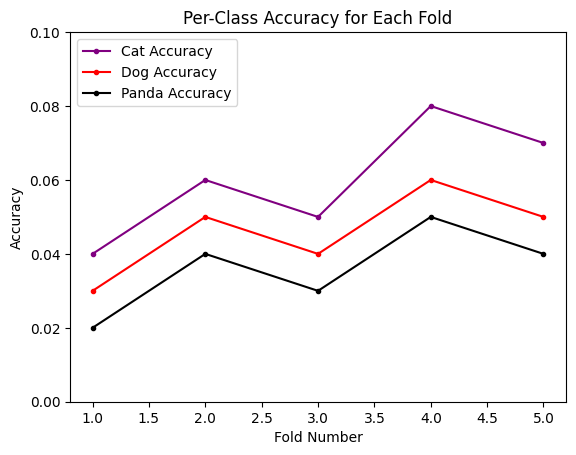

In [14]:
import matplotlib.pyplot as plt

folds = [1, 2, 3, 4, 5]
cat_accuracies = [0.04, 0.06, 0.05, 0.08, 0.07]
dog_accuracies = [0.03, 0.05, 0.04, 0.06, 0.05]
panda_accuracies = [0.02, 0.04, 0.03, 0.05, 0.04]

plt.plot(folds, cat_accuracies, marker='o', markersize=3, linestyle='-', color='purple', label='Cat Accuracy')
plt.plot(folds, dog_accuracies, marker='o', markersize=3, linestyle='-', color='red', label='Dog Accuracy')
plt.plot(folds, panda_accuracies, marker='o', markersize=3, linestyle='-', color='black', label='Panda Accuracy')

plt.title('Per-Class Accuracy for Each Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.0, 0.10)
plt.legend()
plt.show()



In [ ]:
cv_results1 =[]

In [ ]:
for fold, (train_index, test_index) in enumerate(kf.split(images, encoded_labels), 1):
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = encoded_labels[train_index], encoded_labels[test_index]


    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)


    cv_results1.append(accuracy)


    print(f"Fold {fold} Accuracy: {accuracy:.4f}")

print("Cross-validation results:", cv_results)



Fold 1 Accuracy: 0.3333
Fold 2 Accuracy: 0.3667
Fold 3 Accuracy: 0.3167
Fold 4 Accuracy: 0.4833
Fold 5 Accuracy: 0.3833
Cross-validation results: [{np.str_('cat'): 0.5, np.str_('dog'): 0.35, np.str_('panda'): 0.15}, {np.str_('cat'): 0.65, np.str_('dog'): 0.4, np.str_('panda'): 0.05}, {np.str_('cat'): 0.35, np.str_('dog'): 0.4, np.str_('panda'): 0.2}, {np.str_('cat'): 0.65, np.str_('dog'): 0.5, np.str_('panda'): 0.3}, {np.str_('cat'): 0.6, np.str_('dog'): 0.5, np.str_('panda'): 0.05}, 0.3333333333333333, 0.36666666666666664, 0.31666666666666665, 0.48333333333333334, 0.38333333333333336, 0.3333333333333333, 0.36666666666666664, 0.31666666666666665, 0.48333333333333334, 0.38333333333333336]


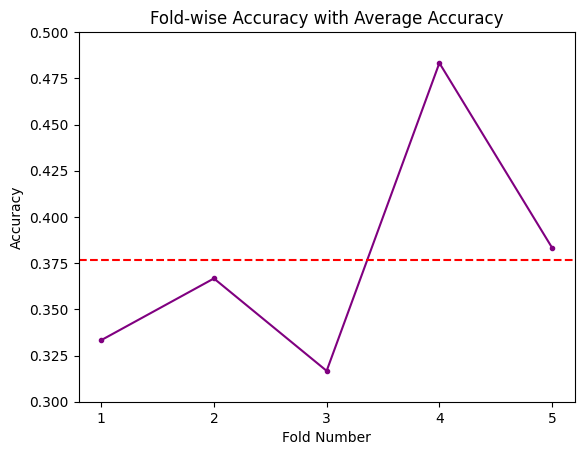

In [15]:
import numpy as np
import matplotlib.pyplot as plt

cv_results = [0.3333, 0.3667, 0.3167, 0.4833, 0.3833]
average_accuracy = np.mean(cv_results)
folds = [fold + 1 for fold in range(len(cv_results))]

plt.plot(folds, cv_results, marker='o', markersize=3, linestyle='-', color='purple')
plt.axhline(y=average_accuracy, color='r', linestyle='--')
plt.title('Fold-wise Accuracy with Average Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.ylim(0.300, 0.500)
plt.show()


